In [1]:
import numpy as np
import cmath
import time
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import scipy.integrate as integrate
# import random

## Lab Book 01

In [2]:
def FFMatrix(n):
    F = np.zeros((n, n), dtype=complex)
    omega = np.exp(-2*cmath.pi/n*1j)
    for i in range(n):
        for j in range(n):
            F[i][j] = pow(omega, i*j)
    return F


In [3]:
n = 10
Fn = FFMatrix(n)
print(f"Check F{n} is symmetric by F{n} = F{n}.T:\n{Fn == Fn.T}")
nI = n*np.eye(n)
Fn_conj = np.conj(Fn)
# print(f"F{n}:\n{Fn}")
# print(f"F{n}·F{n}_conj = \n{Fn@Fn_conj}")
# print(f"{n}·I = \n{nI}")
print(
    f"Check ||F{n}·F{n}_conj|| = ||{n}·I||:\n{np.isclose(np.linalg.norm(nI), np.linalg.norm(Fn@Fn_conj))}")


Check F10 is symmetric by F10 = F10.T:
[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]
Check ||F10·F10_conj|| = ||10·I||:
True


## Lab Book 02

In [4]:
ns = [pow(2, i) for i in range(14)]  # 12/14
FFM_runtime = np.zeros((len(ns), 3))
print("{0:^20}{1:^20}{2:^20}".format(
    "Build Fn", "Calculate DFT", "Use np.fft"))
for i in range(len(ns)):
    xs = np.arange(1, ns[i]+1)
    time_start = time.time()
    # Build matrix Fn
    Fn = FFMatrix(ns[i])
    time1 = time.time()
    # Calculate DFT
    x_hat = Fn @ xs
    time2 = time.time()
    # Calculate the same DFT with np.fft
    Fn2 = np.fft.fft(xs)
    time3 = time.time()
    FFM_runtime[i][0] = time1-time_start
    FFM_runtime[i][1] = time2-time1
    FFM_runtime[i][2] = time3-time2
    print(
        f'{FFM_runtime[i][0]:^20.16f}{FFM_runtime[i][1]:^20.16f}{FFM_runtime[i][2]:^20.16f}')


      Build Fn         Calculate DFT         Use np.fft     
 0.0000371932983398  0.0006787776947021  0.0001871585845947 
 0.0000460147857666  0.0020492076873779  0.0002048015594482 
 0.0000450611114502  0.0001018047332764  0.0000228881835938 
 0.0000460147857666  0.0000090599060059  0.0000100135803223 
 0.0004668235778809  0.0000169277191162  0.0000150203704834 
 0.0006151199340820  0.0000281333923340  0.0000298023223877 
 0.0024969577789307  0.0000498294830322  0.0002212524414062 
 0.0109620094299316  0.0009467601776123  0.0004591941833496 
 0.0499477386474609  0.0001351833343506  0.0000789165496826 
 0.2213809490203857  0.0002779960632324  0.0000419616699219 
 0.6824581623077393  0.0008959770202637  0.0000710487365723 
 3.1462609767913818  0.0034582614898682  0.0001409053802490 
12.2830846309661865  0.0112092494964600  0.0002660751342773 
45.4605779647827148  0.3940839767456055  0.0006079673767090 


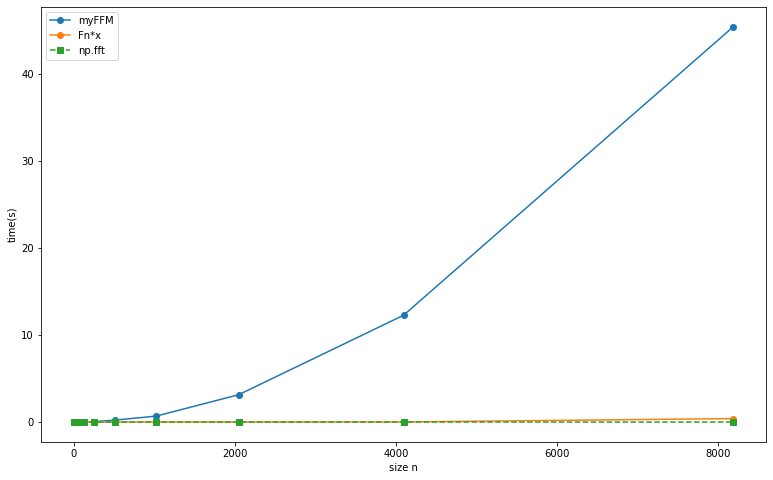

In [5]:
plt.figure(figsize=(13, 8))
plt.clf()
plt.plot(ns, FFM_runtime[:, 0], 'o-', label='myFFM',)
plt.plot(ns, FFM_runtime[:, 1], 'o-', markersize=6, label='Fn*x')
plt.plot(ns, FFM_runtime[:, 2], 's--', label='np.fft')
plt.xlabel('size n')
plt.ylabel('time(s)')
plt.legend(loc='best')
plt.show()


Due to the double for loops of size n used in my DFT, the time complexity of it is O(n^2), therefore when the size of matrix is pretty big, the time consumed is increasing at a rate of n^2. Compared to the O(n*logn) time complexity of FFT, the DFT method is really time consuming and low efficient when n is big.

## Lab Book 03

In [6]:
data = np.loadtxt('lab5_piano_data.csv', delimiter=',')
time = np.linspace(0.0, 1.0, len(data))  # data represents 1 second of audio
print("CSV has a vector of size =", data.shape)
np.random.seed(0)
noisy_data = data + 0.005 * np.random.randn(len(data))


CSV has a vector of size = (44100,)


In [7]:
# Save data as playable files
samplerate = 44100  # samples per second in the audio
# Note: after an inverse DFT you usually get complex values with very small imaginary parts
# (of size machine epsilon), which we need to remove before saving.
wavfile.write('my_audio.wav', samplerate, np.real(data))
wavfile.write('my_audio_noise.wav', samplerate, np.real(noisy_data))

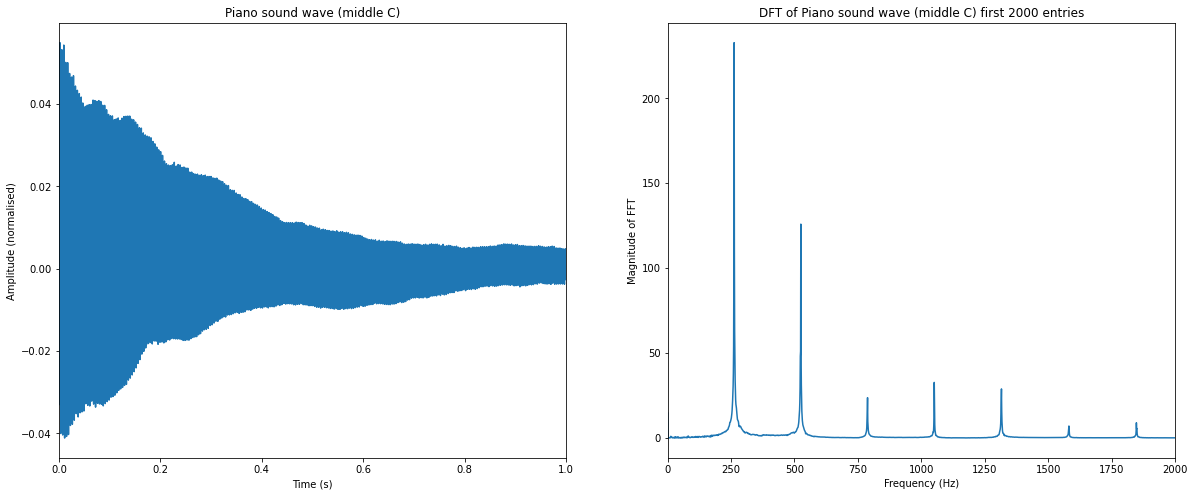

In [8]:
plt. figure(figsize= (20,8))
plt. subplot(1,2,1)
plt. plot(time,data)
plt.title('Piano sound wave (middle C)') 
plt.xlabel('Time (s)') 
plt.ylabel('Amplitude (normalised)') 
plt. xlim(0.0,1.0)

plt. subplot(1,2,2)
plt. plot(np. arange(len(data)),abs(np. fft. fft(data[:]))) 
plt.title('DFT of Piano sound wave (middle C) first 2000 entries') 
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude of FFT')
plt. xlim(0.0,2000)

plt.show()

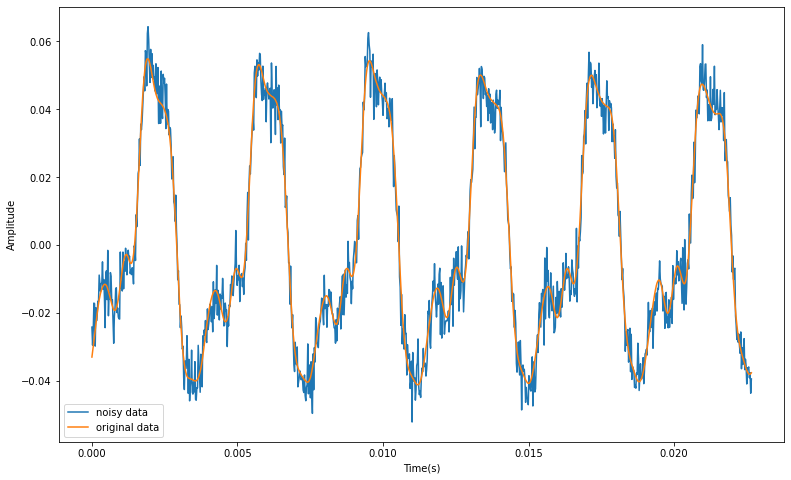

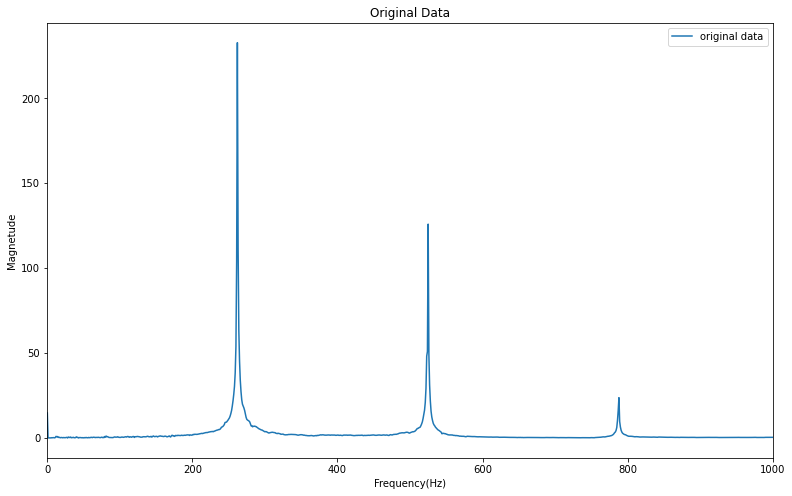

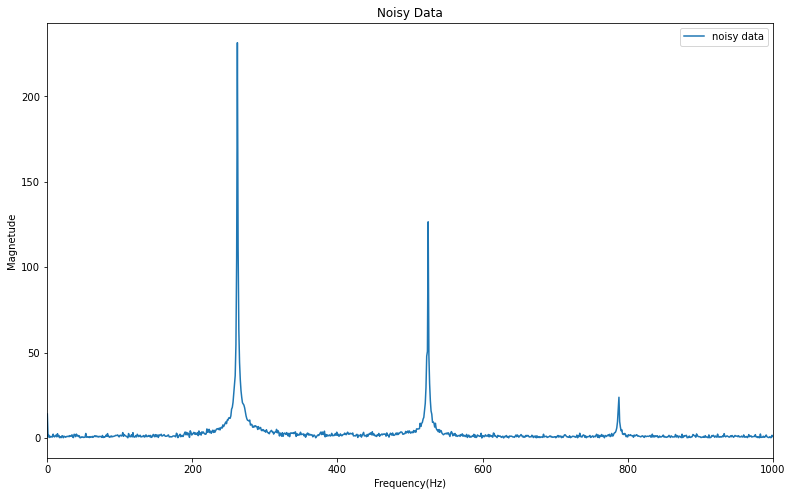

In [9]:
frequency = data.shape[0]
time = np.linspace(0, 1, data.shape[0])
fs = np.arange(0, frequency)
# first 2000 elements
n = 1000

plt.figure(figsize=[13, 8])
plt.plot(time[:n], noisy_data[:n], label='noisy data')
plt.plot(time[:n], data[:n], label='original data')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=[13, 8])
# plt.plot(fs, np.fft.fftshift(
#     abs(np.fft.fft(np.real(noisy_data)))), label='noisy data')
plt.plot(fs, abs(np.fft.fft(np.real(data))), label='original data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnetude')
plt.title('Original Data')
plt.legend(loc='best')
plt.xlim(0, n)
plt.show()

noisy_data_hat = np.fft.fft(noisy_data)
plt.figure(figsize=[13, 8])
plt.plot(fs, abs(noisy_data_hat), label='noisy data')
# plt.plot(fs, np.fft.fftshift(
#     abs(np.fft.fft(np.real(data)))), label='original data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnetude')
plt.title('Noisy Data')
plt.legend(loc='best')
plt.xlim(0, n)
plt.show()

In [10]:
def remove_magnitude(x,lim):
    if abs(x) < lim:
        return 0
    else:
        return x

In [11]:
denoised_hat = list(map(remove_magnitude,noisy_data_hat,[5]*frequency))

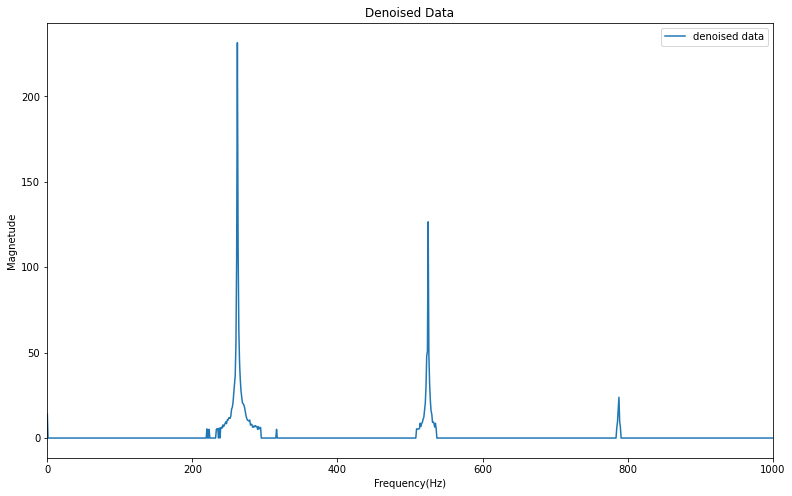

In [12]:
plt.figure(figsize=[13, 8])
plt.plot(fs, list(map(abs,denoised_hat)), label='denoised data')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnetude')
plt.legend(loc='best')
plt.title('Denoised Data')
plt.xlim(0, n)
plt.show()


/Users/x_x/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


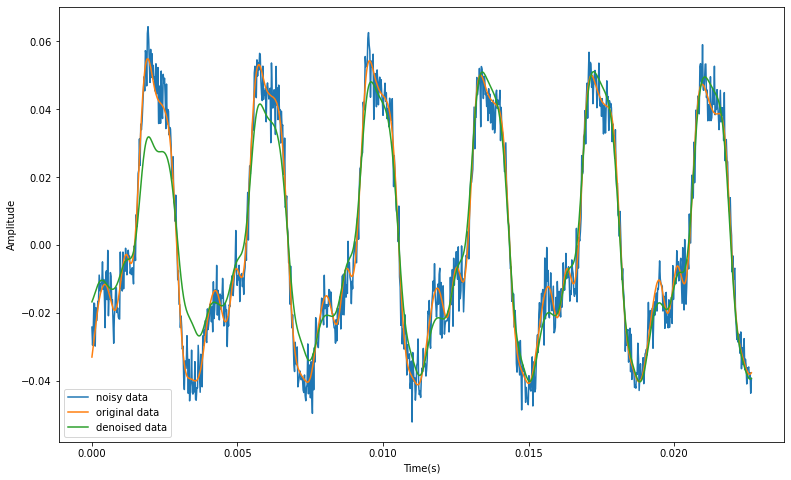

In [13]:
denoised = np.fft.ifft(denoised_hat)

plt.figure(figsize=[13, 8])
plt.plot(time[:n], noisy_data[:n], label='noisy data')
plt.plot(time[:n], data[:n], label='original data')
plt.plot(time[:n], denoised[:n], label='denoised data')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend(loc='best')
plt.show()


In [14]:
err_with_data = np.linalg.norm(denoised-data)
# print(denoised)
# print(data)
err_with_noisy = np.linalg.norm(data-noisy_data)
# print(err_with_data)
# print(err_with_noisy)
print(f"The error of denoised data and noisy data against original data are {err_with_data} and {err_with_noisy} respectively.")
print(f"The denoised signal is clearly closer to the original signal.")

The error of denoised data and noisy data against original data are 0.3475626828391964 and 1.0451029075185467 respectively.
The denoised signal is clearly closer to the original signal.


## Lab Book 04

In [15]:
P = 10000
u0 = 1/P  # initial condition
T = 100   # end time
n = 200  # use n+1 equally spaced time steps
ts = np.linspace(0, T, n+1)  # vector of timesteps, tk = ts[k]
h = T / n  # gap between timesteps

In [16]:
def f(t, u):
    c = 0.2
    return c * u * (1-u)


def u(t):
    P = 10000
    c = 0.2
    return 1/(1+(P-1)*np.exp(-c*t))


def Euler(t0, u0, n):
    u_Euler = np.zeros((n+1,))
    u_Euler[0] = u0
    for k in range(n):
        u_Euler[k+1] = u_Euler[k] + h * f(ts[k], u_Euler[k])
    return u_Euler


def Heun(t0, u0, n):
    u_Heun = np.zeros((n+1,))
    u_Heun[0] = u0
    for k in range(n):
        u_Heun[k+1] = u_Heun[k] + 0.5 * h * \
            (f(ts[k], u_Heun[k]) + f(ts[k]+h, u_Heun[k]+h*f(ts[k], u_Heun[k])))
    return u_Heun


def RK4(t0, u0, T, n):
    h = T / n
    ts = []
    us = []
    ts.append(t0)
    us.append(u0)
    # i = 0
    # while ts[i]+h <= tmax:
    for i in range(n):
        k1 = f(ts[i], us[i])
        k2 = f(ts[i] + 0.5 * h, us[i] + 0.5 * h * k1)
        k3 = f(ts[i] + 0.5 * h, us[i] + 0.5 * h * k2)
        k4 = f(ts[i] + h, us[i] + h * k3)
        us.append(us[i] + (h / 6)*(k1 + 2 * k2 + 2 * k3 + k4))
        ts.append(ts[i] + h)
        # i += 1
    return ts, us


In [17]:
u_Euler = Euler(0, u0, n)
u_Heun = Heun(0, u0, n)
ts_RK4, u_RK4 = RK4(0, u0, T, n)
u_exact = u(ts)

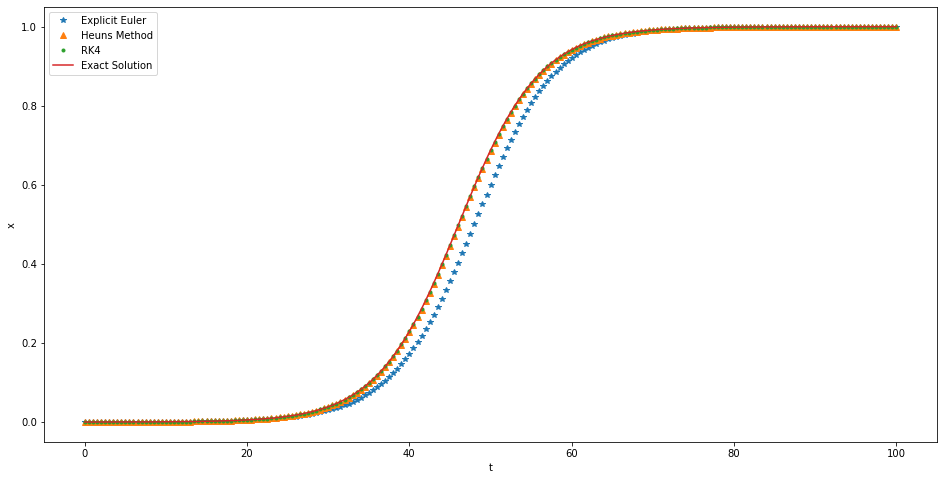

In [18]:
plt.figure(figsize=[16, 8])
plt.plot(ts, u_Euler, '*', label='Explicit Euler')
plt.plot(ts, u_Heun, '^', label='Heuns Method')
plt.plot(ts_RK4, u_RK4, '.', label='RK4')
plt.plot(ts, u_exact, label='Exact Solution')
plt.xlabel('t')
plt.ylabel('x')
plt.legend(loc='best')
plt.show()


The Explicit Euler method has a much lower accuracy conpared to Heuns Method and RK4.

This solution of ODE shows the whole process of the spread of a disease in 100 days. We can see a quick raise in infected population between 40-60 days and about 80% of the population will be infected in this period if no method like quarantine and vaccine. 

## Lab Book 05

In [19]:
ns = [50, 100, 200, 400, 800, 1600]
E = []
H = []
RK = []
hss = []
print("{0:^7}{1:^20}{2:^20}{3:^20}".format("h", "Euler", "Heun", "RK4"))
for n in ns:
    ts = np.linspace(0, T, n+1)
    h = T / n
    u_Euler = Euler(0, u0, n)
    u_Heun = Heun(0, u0, n)
    ts_RK4, u_RK4 = RK4(0, u0, T, n)
    u_exact = u(ts)
    Euler_max = max(abs(u_Euler-u_exact))
    Heun_max = max(abs(u_Heun-u_exact))
    RK4_max = max(abs(u_RK4-u_exact))
    hss.append(h)
    E.append(Euler_max)
    H.append(Heun_max)
    RK.append(RK4_max)
    print(f'{h:^5.5f}{Euler_max:^20.16f}{Heun_max:^20.16f}{RK4_max:^20.16f}')


   h          Euler                Heun                RK4         
2.00000 0.3511787828005281  0.0392733327566064  0.0002786116269167 
1.00000 0.1876126831731261  0.0112001559813495  0.0000203235920652 
0.50000 0.0961272883004560  0.0029997295057085  0.0000013730543685 
0.25000 0.0485262270538754  0.0007761598708744  0.0000000892409335 
0.12500 0.0243630855173878  0.0001974844529142  0.0000000056883146 
0.06250 0.0122042807862079  0.0000498082592145  0.0000000003590142 


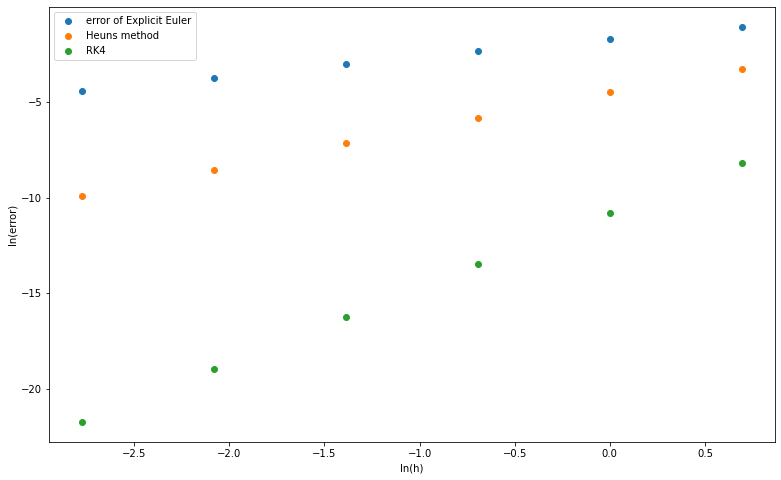

the order of convergence of Explicit Euler method is 0.9729965612487067
the order of convergence of Heun's method is 1.9297731741060276
the order of convergence of RK4 is 3.919458729847732


In [20]:
plt.figure(figsize=[13, 8])
plt.scatter(np.log(hss), np.log(E), label='error of Explicit Euler')
plt.scatter(np.log(hss), np.log(H), label='Heuns method')
plt.scatter(np.log(hss), np.log(RK), label='RK4')
plt.legend()
plt.xlabel('ln(h)')
plt.ylabel('ln(error)')
plt.show()
slope1 = np.polyfit(np.log(hss), np.log(E), 1)[0]
slope2 = np.polyfit(np.log(hss), np.log(H), 1)[0]
slope3 = np.polyfit(np.log(hss), np.log(RK), 1)[0]
print(f"the order of convergence of Explicit Euler method is {slope1}")
print(f"the order of convergence of Heun's method is {slope2}")
print(f"the order of convergence of RK4 is {slope3}")


## Lab Book 06

In [21]:
def f_immu(t, u):
    c = 0.2
    return c * u * max(1-u-0.01*max(t-5, 0), 0)


def f_immu0(t, u):
    c = 0.2
    return c * u * max(1-u-0.01*t, 0)


In [22]:
P = 10000
u0 = np.array([1/P])
T = 100
sol = integrate.solve_ivp(f, [0, T], u0, method='RK45')
# print(sol.y)
sol_immu = integrate.solve_ivp(f_immu, [0, T], u0, method='RK45')
# print(sol_immu.y)
healthy = sol.y * P
healthy_immu = sol_immu.y * P
sol_immu0 = integrate.solve_ivp(f_immu0, [0, T], u0, method='RK45')
healthy_immu0 = sol_immu0.y * P


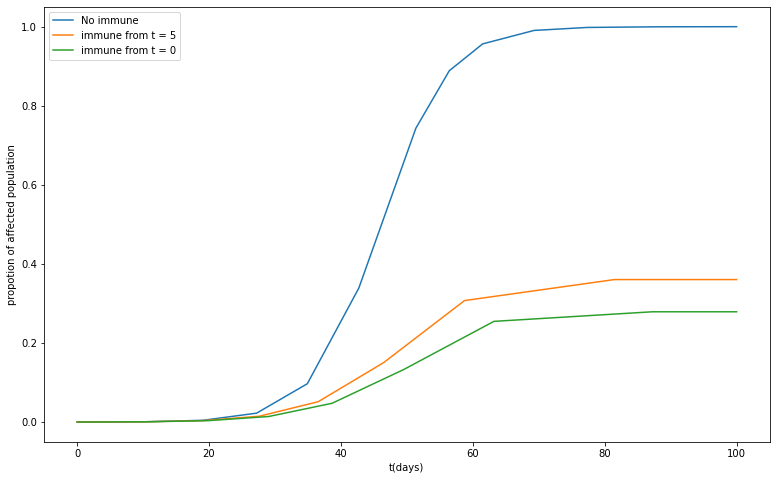

In [23]:
plt.figure(figsize=[13, 8])
plt.plot(sol.t, sol.y[0,:], label='No immune')
plt.plot(sol_immu.t, sol_immu.y[0,:], label='immune from t = 5')
plt.plot(sol_immu0.t, sol_immu0.y[0,:], label='immune from t = 0')
plt.xlabel('t(days)')
plt.ylabel('propotion of affected population')
plt.legend(loc='best')
plt.show()


In [24]:
print(f"Without immune, the number of healthy people mathmetically is {P*(1-sol.y[0][-1])}, which means almost no one is still healthy after 100 days.")
print(f"\nWith vaccinating from the fifth day, the mathmetically number of healthy people after 100 days is {P*(1-sol_immu.y[0][-1])}, which is about 6396 people.")
extra_healthy = abs(sol_immu0.y[0][-1] - sol_immu.y[0][-1])
print(f"\n{extra_healthy*P} (815) more people will be healthy if we start vaccination from t = 0 after 100 days.")

Without immune, the number of healthy people mathmetically is 0.7488286951184975, which means almost no one is still healthy after 100 days.

With vaccinating from the fifth day, the mathmetically number of healthy people after 100 days is 6395.897785341395, which is about 6396 people.

814.9610528256312 (815) more people will be healthy if we start vaccination from t = 0 after 100 days.


## Lab Book 07

In [25]:
def f(x):
    return np.sin(np.pi*x)


def f_t_ut(a, b, c, n, u):
    delta_x = 1 / n
    u_k = np.zeros(n+1)
    u_k[0] = a
    u_k[-1] = b
    for i in range(1, n):
        u_k[i] = c * (u[i-1] - 2 * u[i] + u[i+1]) / pow(delta_x, 2)
    return u_k


In [26]:
def PDE_solver(a, b, c, f, t_max, n):
    delta_t = t_max / (pow(n, 2))
    delta_x = 1 / n
    j = np.arange(n+1)
    xs = j * delta_x
    u = np.zeros((pow(n, 2)+1, n+1))
    # u = np.array([f(xs)])
    u[0] = f(xs)
    # t = 0
    # while t <= t_max:
    #     u_next = u[-1] + [delta_t * f_t_ut(a, b, c, n, u[-1])]
    #     u = np.append(u, u_next, axis=0)
    #     t += delta_t
    for i in range(1, u.shape[0]):
        u[i] = u[i-1] + [delta_t * f_t_ut(a, b, c, n, u[i-1])]
    return u


(101, 11)


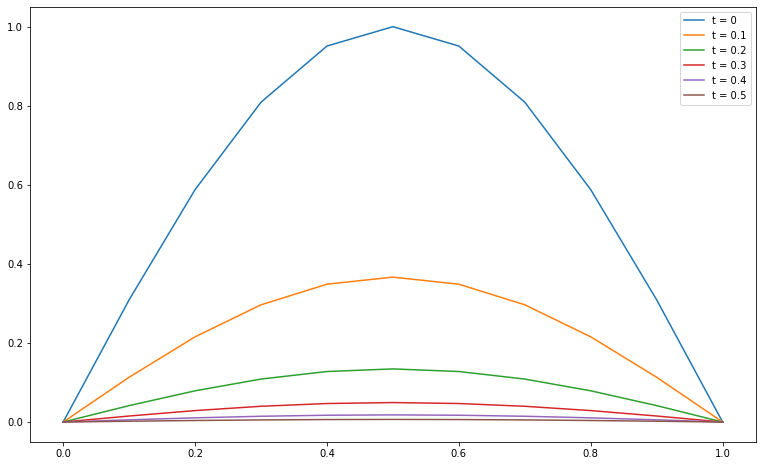

In [27]:
a = 0
b = 0
c = 1
t_max = 0.5
n = 10
u = PDE_solver(a, b, c, f, t_max, n)
print(u.shape)
xs = np.linspace(0, 1, len(u[0]))
ts = np.linspace(0, t_max, 6)
t_index = (ts*100/t_max)
plt.figure(figsize=[13, 8])
for i in t_index:
    i = int(i)
    plt.plot(xs, u[i])
plt.legend(['t = 0', 't = 0.1', 't = 0.2', 't = 0.3', 't = 0.4', 't = 0.5'])
plt.show()


## Lab Book 08

In [28]:
def f(x):
    return 0.5 - x


In [29]:
alpha1 = 0.48
dt1 = alpha1/pow(n,2)
alpha2 = 0.5
dt2 = alpha2/pow(n,2)
alpha3 = 0.52
dt3 = alpha3/pow(n,2)
n = 100


In [30]:
u1 = PDE_solver(0.5,-0.5,1,f,alpha1,n)
u2 = PDE_solver(0.5,-0.5,1,f,alpha2,n)
u3 = PDE_solver(0.5,-0.5,1,f,alpha3,n)


/Users/x_x/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/x_x/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app
/Users/x_x/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


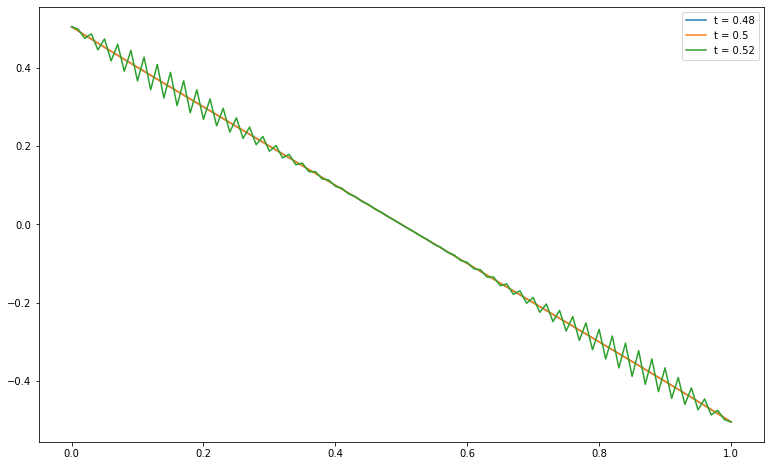

In [31]:
xs = np.linspace(0, 1, len(u1[0]))
ts = np.linspace(0, t_max, 6)
t_index = 200
plt.figure(figsize=[13, 8])
plt.plot(xs, u1[t_index], label = 't = 0.48')
plt.plot(xs, u2[t_index],label = 't = 0.5')
plt.plot(xs, u3[t_index],label = 't = 0.52')
plt.legend()
plt.show()


Both t = 0.48 and t = 0.5 gives correct solution because dt <= dx^2 / 2c.

However when t = 0.52, dt > dx^2 / 2c, therefore the method we use to find the solution to the heat equation is no longer stable and leads to the fluctuations in solutions.